# Cherry Blossoms!

If we travel back in time a few months, [cherry blossoms](https://en.wikipedia.org/wiki/Cherry_blossom) were in full bloom! We don't live in Japan or DC, but we do have our fair share of the trees - buuut you sadly missed [Brooklyn Botanic Garden's annual festival](https://www.bbg.org/visit/event/sakura_matsuri_2019).

We'll have to make up for it with data-driven cherry blossoms instead. Once upon a time [Data is Plural](https://tinyletter.com/data-is-plural) linked to [a dataset](http://atmenv.envi.osakafu-u.ac.jp/aono/kyophenotemp4/) about when the cherry trees blossom each year. It's a little out of date, but it's quirky in a real nice way so we're sticking with it.

## 0. Do all of your importing/setup stuff

In [1]:
import pandas as pd
import numpy as np 
%matplotlib inline

## 1. Read in the file using pandas, and look at the first five rows

In [2]:
df = pd.read_excel("KyotoFullFlower7.xls",  sep='\t',  skiprows= 25, na_values= "-" )

## 2. Read in the file using pandas CORRECTLY, and look at the first five rows

Hrm, how do your column names look? Read the file in again but this time add a parameter to make sure your columns look right.

**TIP: The first year should be 801 AD, and it should not have any dates or anything.**

In [3]:
df.columns = df.columns.str.replace(" ", "_")
df.columns = df.columns.str.replace("-", "_")

In [4]:
df.columns = df.columns.str.replace("Full_flowering_date_\(DOY\)","DOY")

In [5]:
df.head()

,AD,DOY,Full_flowering_date,Source_code,Data_type_code,Reference_Name
0,801,NaN,NaN,NaN,NaN,NaN
1,802,NaN,NaN,NaN,NaN,NaN
2,803,NaN,NaN,NaN,NaN,NaN
3,804,NaN,NaN,NaN,NaN,NaN
4,805,NaN,NaN,NaN,NaN,NaN


In [6]:
df.tail()

,AD,DOY,Full_flowering_date,Source_code,Data_type_code,Reference_Name
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1214,2015,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)


## 4. Add some more NaN values

It looks like you should probably have some NaN/missing values earlier on in the dataset under "Reference name." Read in the file *one more time*, this time making sure all of those missing reference names actually show up as `NaN` instead of `-`.

In [7]:
df.head()

,AD,DOY,Full_flowering_date,Source_code,Data_type_code,Reference_Name
0,801,NaN,NaN,NaN,NaN,NaN
1,802,NaN,NaN,NaN,NaN,NaN
2,803,NaN,NaN,NaN,NaN,NaN
3,804,NaN,NaN,NaN,NaN,NaN
4,805,NaN,NaN,NaN,NaN,NaN


## 4. What source is the most common as a reference?

In [8]:
df.Source_code.value_counts().head(1)

3.0    342
Name: Source_code, dtype: int64

# 6. Filter the list to only include columns where the 'Full-flowering date (DOY)' is not missing

If you’d like to do it in two steps (which might be easier to think through), first figure out how to test whether a column is empty/missing/null/NaN, get the list of `True`/`False` values, and then later feed it to your `df`.

In [9]:
df.DOY.dropna()

11       92.0
14      105.0
30       96.0
50      108.0
52      104.0
63      100.0
65      106.0
68       95.0
88      104.0
90      109.0
91      108.0
93      106.0
94      104.0
95      104.0
101     102.0
107      98.0
111      95.0
112     110.0
116      95.0
122     104.0
125      98.0
129      97.0
132     106.0
140     109.0
148     107.0
149      95.0
154      89.0
156     112.0
157     109.0
158      97.0
        ...  
1185    102.0
1186     95.0
1187    106.0
1188     93.0
1189     88.0
1190     97.0
1191     94.0
1192     97.0
1193     99.0
1194     99.0
1195    103.0
1196     97.0
1197     91.0
1198     94.0
1199    100.0
1200     96.0
1201     91.0
1202     98.0
1203     92.0
1204     99.0
1205     98.0
1206     97.0
1207     95.0
1208     95.0
1209     95.0
1210     99.0
1211    101.0
1212     93.0
1213     94.0
1214     93.0
Name: DOY, Length: 827, dtype: float64

## 7. Make a histogram of the full-flowering date

Is it not showing up? Remember the "magic" command that makes graphs show up in matplotlib notebooks!

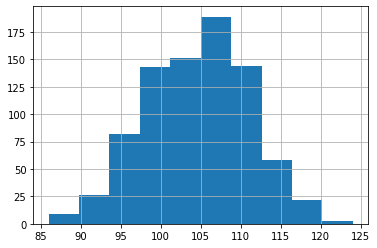

In [10]:
df.DOY.hist()

## 8. Make another histogram of the full-flowering date, but with 39 bins instead of 10

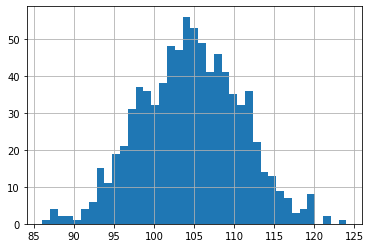

In [11]:
df.DOY.hist(bins=39)

## 9. What's the average number of days it takes for the flowers to blossom? And how many records do we have?

Answer these both with one line of code.

In [12]:
df.DOY.mean().round()

105.0

In [13]:
df.DOY.count()

827

## 10. What's the average days into the year cherry flowers normally blossomed before 1900?



In [14]:
df[df.AD < 1900].DOY.mean().round()

105.0

## 11. How about after 1900?

In [15]:
df[df.AD > 1900].DOY.mean().round()

100.0

## 12. How many times was our data from a title in Japanese poetry?

You'll need to read the documentation inside of the Excel file.

In [16]:
df[df.Source_code == 4].Source_code.value_counts()

4.0    250
Name: Source_code, dtype: int64

## 13. Show only the years where our data was from a title in Japanese poetry

In [17]:
df[df.Source_code == 4].AD

149      950
178      979
184      985
188      989
218     1019
230     1031
297     1098
301     1102
303     1104
313     1114
316     1117
324     1125
325     1126
330     1131
333     1134
338     1139
340     1141
342     1143
358     1159
360     1161
362     1163
363     1164
364     1165
365     1166
366     1167
368     1169
369     1170
371     1172
372     1173
373     1174
        ... 
1129    1930
1130    1931
1131    1932
1133    1934
1136    1937
1137    1938
1138    1939
1139    1940
1140    1941
1145    1946
1146    1947
1147    1948
1148    1949
1149    1950
1150    1951
1190    1991
1191    1992
1192    1993
1193    1994
1194    1995
1195    1996
1196    1997
1197    1998
1198    1999
1199    2000
1200    2001
1201    2002
1202    2003
1203    2004
1204    2005
Name: AD, Length: 250, dtype: int64

## 14. Graph the full-flowering date (DOY) over time

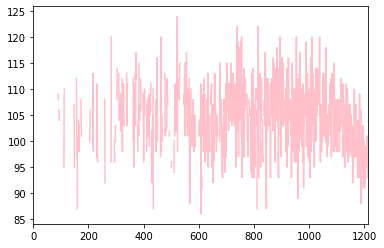

In [18]:
df.DOY.plot(x= "DOY", y = 'AD', color = 'pink')

## 15. Smooth out the graph

It's so jagged! You can use `df.rolling` to calculate a rolling average.

The following code calculates a **10-year mean**, using the `AD` column as the anchor. If there aren't 20 samples to work with in a row, it'll accept down to 5. Neat, right?

(We're only looking at the final 5)

In [19]:
rolling_date = df.rolling(20, on='AD', min_periods=5)["DOY"].mean().tail()

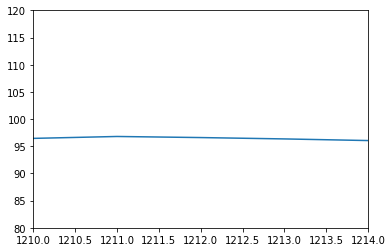

In [20]:
rolling_date.plot(x= "year", y="DOY", ylim=(80, 120))

Use the code above to create a new column called `rolling_date` in our dataset. It should be the 20-year rolling average of the flowering date. Then plot it, with the year on the x axis and the day of the year on the y axis.

Try adding `ylim=(80, 120)` to your `.plot` command to make things look a little less dire.

### 16. Add a month column

Right now the "Full-flowering date" column is pretty rough. It uses numbers like '402' to mean "April 2nd" and "416" to mean "April 16th." Let's make a column to explain what month it happened in.

* Every row that happened in April should have 'April' in the `month` column.
* Every row that happened in March should have 'March' as the `month` column.
* Every row that happened in May should have 'May' as the `month` column.

**I've given you March as an example**, you just need to add in two more lines to do April and May.

In [21]:
df.loc[(df['Full_flowering_date'] < 400)& (df['Full_flowering_date'] > 300), 'month'] = 'March'

In [22]:
df.loc[(df['Full_flowering_date'] < 500) & (df['Full_flowering_date'] > 400) , 'month'] = 'April'

In [23]:
df.loc[(df['Full_flowering_date'] < 600) & (df['Full_flowering_date'] > 500) , 'month'] = 'May'

### 17. Using your new column, how many blossomings happened in each month?

In [24]:
df.month.value_counts()

April    814
March     10
May        3
Name: month, dtype: int64

### 18. Graph how many blossomings happened in each month.

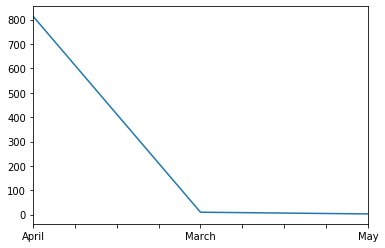

In [25]:
df.month.value_counts().plot()

## 19. Adding a day-of-month column

Now we're going to add a new column called "day of month." It's actually a little tougher than it should be since the `Full-flowering date` column is a *float* instead of an integer.

In [7]:
df["Full_flowering_date"] = df.Full_flowering_date.astype(int)

ValueError: Cannot convert non-finite values (NA or inf) to integer

And if you try to convert it to an int, **pandas yells at you!**

In [ ]:
df.Full_flowering_date.tail()

That's because, as you can read, you can't have an `NaN` be an integer. But, for some reason, it *can* be a float. Ugh! So what we'll do is **drop all of the na values, then convert them to integers to get rid of the decimals.**

I'll show you the first 5 here.

In [ ]:
df['Full_flowering_date'].dropna().astype(float).head()

On the next line, I take the first character of the row and add a bunch of exclamation points on it. I want you to edit this code to **return the last TWO digits of the number**. This only shows you the first 5, by the way.

You might want to look up 'list slicing.'

In [34]:
df['Full_flowering_date'].dropna().astype(int).astype(str).apply(lambda value: value[1:3] + "!!!").head()

11    01!!!
14    15!!!
30    06!!!
50    18!!!
52    14!!!
Name: Full_flowering_date, dtype: object

Now that you've successfully extracted the last two letters, save them into a new column called `'day-of-month'`

In [36]:
df.day_of_month = df['Full_flowering_date'].dropna().astype(int).astype(str).apply(lambda value: value[1:3] + "!!!").head()

In [37]:
df.day_of_month

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9         NaN
10        NaN
11      01!!!
12        NaN
13        NaN
14      15!!!
15        NaN
16        NaN
17        NaN
18        NaN
19        NaN
20        NaN
21        NaN
22        NaN
23        NaN
24        NaN
25        NaN
26        NaN
27        NaN
28        NaN
29        NaN
        ...  
1185      NaN
1186      NaN
1187      NaN
1188      NaN
1189      NaN
1190      NaN
1191      NaN
1192      NaN
1193      NaN
1194      NaN
1195      NaN
1196      NaN
1197      NaN
1198      NaN
1199      NaN
1200      NaN
1201      NaN
1202      NaN
1203      NaN
1204      NaN
1205      NaN
1206      NaN
1207      NaN
1208      NaN
1209      NaN
1210      NaN
1211      NaN
1212      NaN
1213      NaN
1214      NaN
Name: day_of_month, Length: 1215, dtype: object

### 20. Adding a date column

Now take the `'month'` and `'day-of-month'` columns and combine them in order to create a new column called `'date'`

In [43]:
df["date"] = df.merge(df.left_on='day_of_month', right_on = 'month')
df.date

SyntaxError: keyword can't be an expression (<ipython-input-43-dce054359a78>, line 1)

# YOU ARE DONE.

And **incredible.**